### Week 3
### DSC 630
### Abed Tabbalat

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.
You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

In [13]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Settings
sns.set(rc={'figure.figsize': (15, 8)})

In [15]:
# importing data
df = pd.read_csv('dodgers-2022.csv')
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


### Data Exploration

In [16]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


To give a recommendation on how to improve attendance starts with what is the type of data we have. The answer is we are dealing with 3 integer type fields and therest are object. This means to do a correlation exercise we need to asses which objects matter to convert them and apply a correlation exercise there.

First, a few graphs to see what would the raw data suggest is necessary, days of the week is a good metric to asses, a bar chart showing the attendance on specific days could be more than others

<AxesSubplot:xlabel='day_of_week', ylabel='attend'>

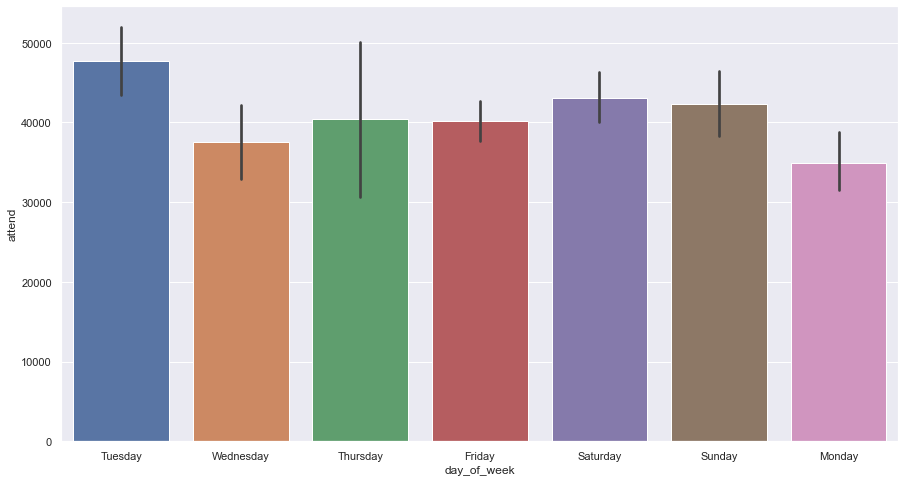

In [17]:
# bar chart days of the week
sns.barplot(data=df, x='day_of_week', y='attend')

Using general logic, without looking at real data, weekends (Saturday/Sunday) would be assumed to have a higher attendance than workdays (Monday-Friday). The barchart shows that weekends are higher all days except tuesdays, which is an interesting day to be higher than normal. This could be that more games have been scheduled on tuesdays, therefore another barchart to show the count of games that could result in Tuesdays being higher.

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

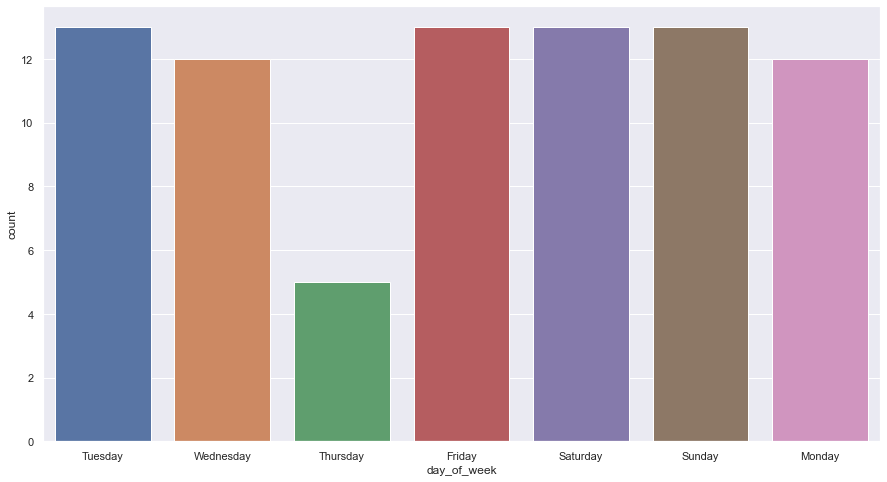

In [18]:
# Count plot for number of games played per day
sns.countplot(data=df, x='day_of_week')

The count plot raised more questions on thursday could be a high attendance day since it has the lowest count of games yet attendance is up there with Friday.

A quick check on the months should also tell if there is some seasonality to how attendance is impacted.

<AxesSubplot:xlabel='month', ylabel='attend'>

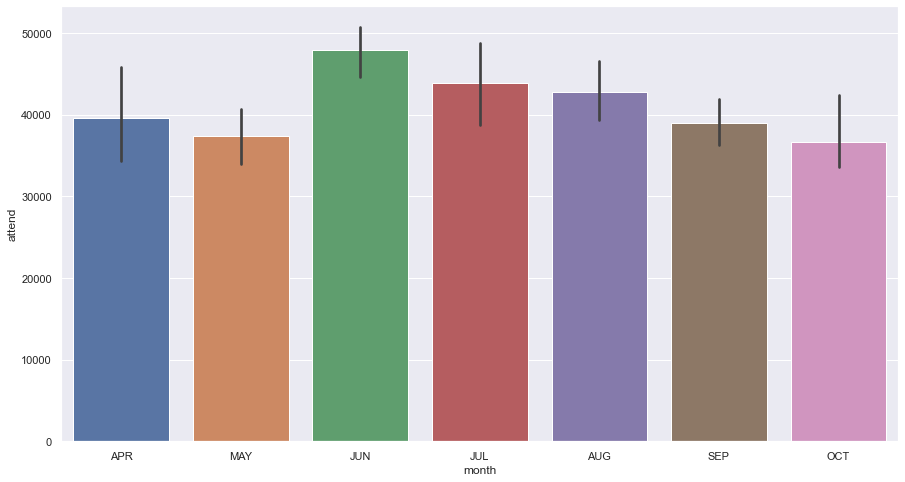

In [22]:
# Bar plot and count plotfor months on attendance
sns.barplot(data=df, x='month', y='attend')

<AxesSubplot:xlabel='month', ylabel='count'>

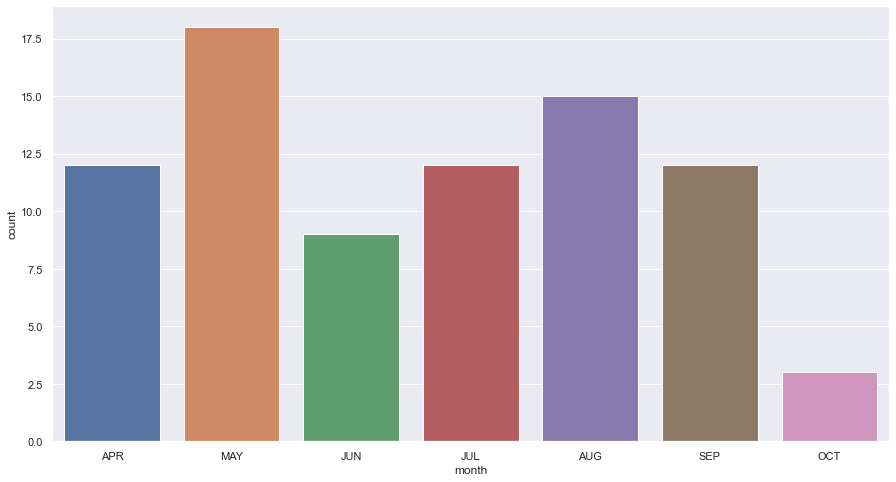

In [23]:
# Count plot for months
sns.countplot(data=df, x='month')

Most game count is in may yet it has the lowest attendance, and least amount is in october which suggest could suggest playoffs games are in october.

Exploring another area which is the weather and see how that impacts attendance, this is why the end goal is a correlation matrix that would tell us what are impacting attendance the most.

<AxesSubplot:xlabel='skies', ylabel='attend'>

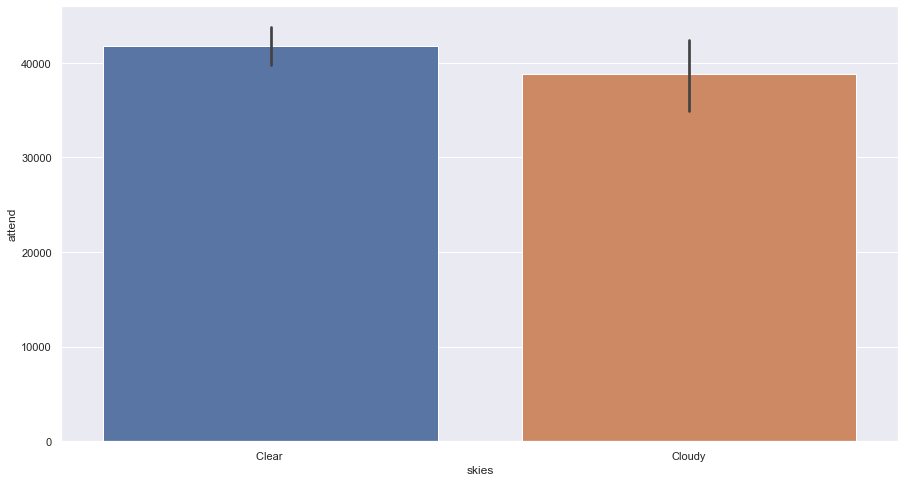

In [19]:
# bar chart on weather
sns.barplot(data=df, x='skies', y='attend')

Chart doesnt show a significant impact to attendance if the skies are clear or cloudy.

Let's see if oponents matter then!

<AxesSubplot:xlabel='opponent', ylabel='attend'>

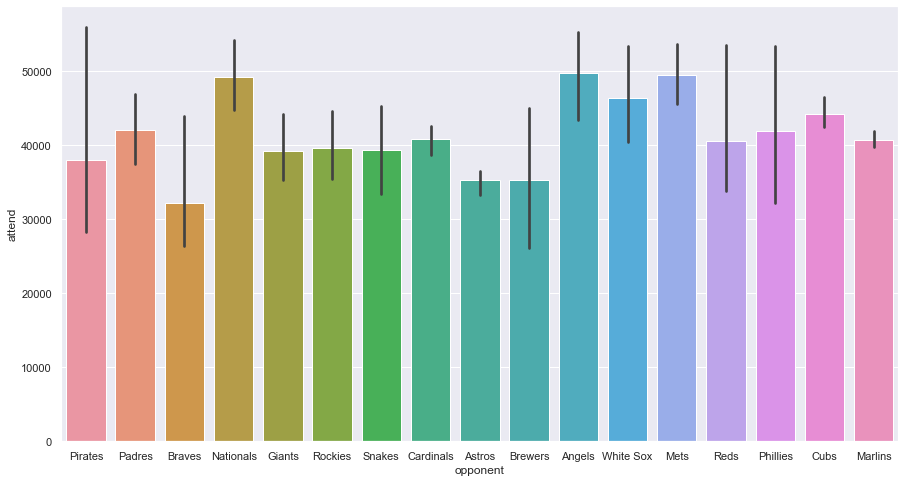

In [24]:
# Bar plot for attendance based off of who the team is playing
sns.barplot(data=df, x='opponent', y='attend')

<AxesSubplot:xlabel='opponent', ylabel='count'>

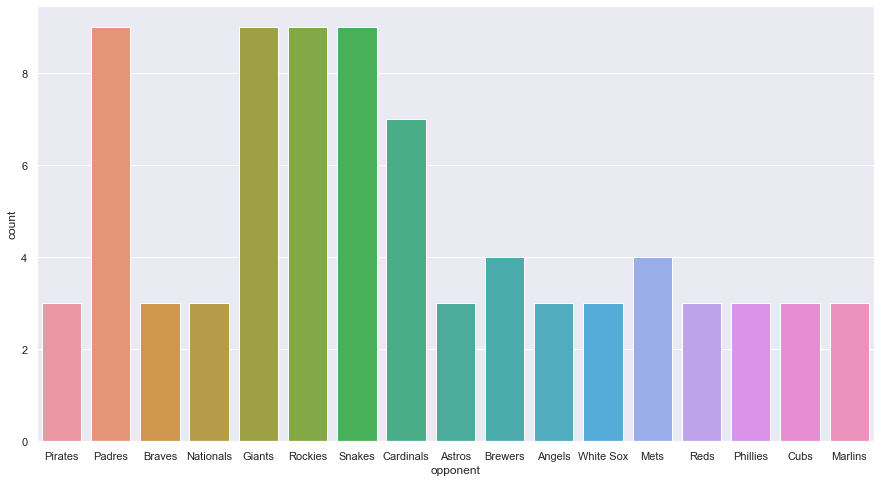

In [25]:
# Count plot based off of how many games the team plays an oponent
sns.countplot(data=df, x='opponent')

All teams have equal games except for:

* Padres
* Giants
* Snakes
* cardinals
* Brewers (1 extra)
* Mets (1 extra)

This means that the most played opponents are teams within the same division which would make sense they would play each other the most.

### Correlation

Applying a correlation to the data as it is will only be applied to the numerical data and the categorical variables will be ommited

<AxesSubplot:>

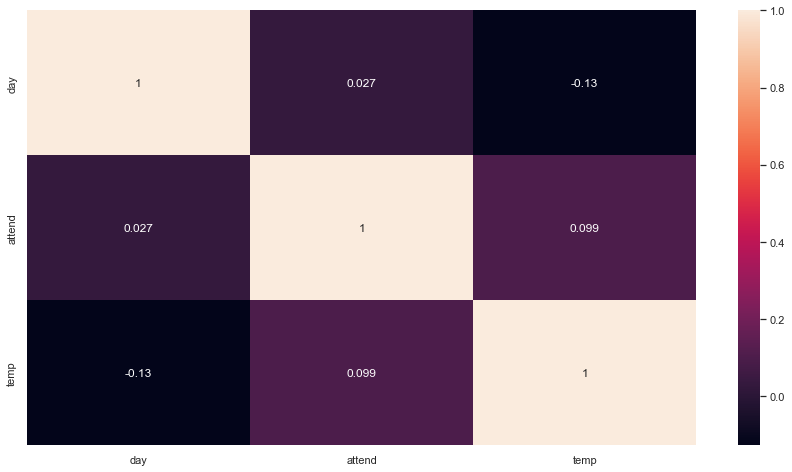

In [26]:
# Correlation matrix on the current data
corr_rawdata = df.corr()
# heatmap visual
sns.heatmap(corr_rawdata, annot=True)

Since we need the other variables into the correlation matrix, we will have to wrangle the data a little bit. To be specific we are trying to find what correlates with attendance, therefore we want to see how the correlation is applied to attendance.

In [27]:
# Applying dummy variables to do spearman correlation
df1 = pd.concat([df.drop(['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'], axis=1), pd.get_dummies(df[['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks']])], axis=1)
df1

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES
0,10,56000,67,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
4,14,46549,57,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,29,40724,84,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,0,1,0
77,30,35607,95,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
78,1,33624,86,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
79,2,42473,83,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0


In [32]:
# Creating spearman correlation to find the relationship between numeric and categorical data
corr_spearman = df1.corr('spearman')
corr_spearman.style.background_gradient(cmap='RdBu')

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES
day,1.000000,0.063626,-0.123692,0.104875,-0.028569,-0.079586,0.108461,0.153172,-0.293820,-0.113057,0.134612,-0.119007,0.083503,0.035273,0.172376,-0.090701,-0.165867,-0.106335,0.179090,0.141313,0.319518,0.038556,-0.237854,-0.216080,0.159502,0.130490,0.225262,-0.188335,0.053167,-0.131519,-0.264438,-0.021860,0.052969,0.029382,0.054252,-0.054252,0.052377,-0.052377,0.194109,-0.194109,0.037777,-0.037777,-0.091546,0.091546
attend,0.063626,1.000000,0.090628,-0.055739,0.101270,0.096614,0.314192,-0.223536,-0.109043,-0.109991,-0.030209,-0.325514,0.128028,0.051787,-0.008776,0.333736,-0.167959,0.204106,-0.156575,-0.167758,-0.134038,0.015034,0.109043,-0.086529,0.002796,0.248580,0.204106,0.038644,-0.011184,-0.082481,-0.030756,-0.082328,-0.089049,0.139799,0.144553,-0.144553,0.031944,-0.031944,0.051039,-0.051039,-0.139799,0.139799,-0.015361,0.015361
temp,-0.123692,0.090628,1.000000,-0.495820,0.296848,0.012656,-0.132964,-0.337159,0.268880,0.527833,-0.167878,-0.024568,-0.044672,0.237768,0.014286,-0.020895,0.010423,-0.184855,-0.226868,-0.278683,-0.059812,0.181659,0.082625,0.196922,0.032210,0.076901,-0.079824,-0.010099,-0.025208,-0.273081,-0.092428,0.161577,0.167468,-0.102230,0.259024,-0.259024,0.249189,-0.249189,-0.066466,0.066466,-0.011203,0.011203,0.178363,-0.178363
month_APR,0.104875,-0.055739,-0.495820,1.000000,-0.198811,-0.173913,-0.147442,-0.222911,-0.081786,-0.173913,0.007013,-0.076087,0.007013,0.007013,0.037438,0.007013,0.021739,-0.081786,-0.081786,0.470270,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,-0.095050,0.470270,0.184302,-0.081786,0.470270,-0.081786,-0.147442,-0.147442,-0.081786,-0.343251,0.343251,0.069584,-0.069584,0.066354,-0.066354,-0.102233,0.102233,0.006808,-0.006808
month_AUG,-0.028569,0.101270,0.296848,-0.198811,1.000000,-0.198811,-0.168550,-0.254824,-0.093495,-0.198811,0.051309,-0.019881,-0.035275,-0.035275,0.009782,-0.035275,0.069584,-0.093495,-0.093495,-0.093495,-0.108657,-0.146625,0.411377,0.134840,0.411377,-0.108657,-0.093495,-0.168550,-0.093495,-0.093495,-0.093495,0.134840,0.134840,-0.093495,0.188903,-0.188903,0.018182,-0.018182,-0.128951,0.128951,0.093495,-0.093495,-0.034245,0.034245
month_JUL,-0.079586,0.096614,0.012656,-0.173913,-0.198811,1.000000,-0.147442,-0.222911,-0.081786,-0.173913,-0.087664,0.119565,-0.087664,0.007013,-0.106966,0.101690,0.021739,-0.081786,-0.081786,-0.081786,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,0.065347,-0.081786,0.184302,0.470270,-0.081786,0.470270,-0.147442,0.073721,-0.081786,-0.097204,0.097204,-0.019881,0.019881,-0.157591,0.157591,0.081786,-0.081786,0.006808,-0.006808
month_JUN,0.108461,0.314192,-0.132964,-0.147442,-0.168550,-0.147442,1.000000,-0.188982,-0.069338,-0.147442,0.059456,-0.036860,0.059456,-0.047565,0.072548,-0.047565,-0.036860,0.554700,-0.069338,-0.069338,-0.080582,-0.108740,-0.069338,-0.125000,-0.069338,0.463348,-0.069338,-0.125000,-0.069338,-0.069338,-0.069338,-0.125000,-0.125000,0.554700,0.103011,-0.103011,0.033710,-0.033710,0.056254,-0.056254,-0.138675,0.138675,-0.046176,0.046176
month_MAY,0.153172,-0.223536,-0.337159,-0.222911,-0.254824,-0.222911,-0.188982,1.000000,-0.104828,-0.222911,0.008989,0.027864,0.008989,0.008989,-0.013710,0.008989,-0.055728,-0.104828,0.366900,-0.104828,0.426401,0.152656,-0.104828,0.094491,-0.104828,-0.121829,-0.104828,-0.188982,-0.104828,-0.104828,-0.104828,0.094491,0.000000,-0.104828,0.155738,-0.155738,-0.101929,0.10

The above table shows the spearman correlation for all the variables, since we are focusing on attendance let's show the correlation for attendance

In [40]:
corr_spearman['attend'].sort_values(ascending=False)

attend                   1.000000
day_of_week_Tuesday      0.333736
month_JUN                0.314192
opponent_Mets            0.248580
opponent_Nationals       0.204106
opponent_Angels          0.204106
skies_Clear              0.144553
shirt_YES                0.139799
opponent_White Sox       0.139799
day_of_week_Saturday     0.128028
opponent_Cubs            0.109043
month_AUG                0.101270
month_JUL                0.096614
temp                     0.090628
day                      0.063626
day_of_week_Sunday       0.051787
cap_NO                   0.051039
opponent_Padres          0.038644
day_night_Day            0.031944
fireworks_YES            0.015361
opponent_Cardinals       0.015034
opponent_Marlins         0.002796
day_of_week_Thursday    -0.008776
opponent_Phillies       -0.011184
fireworks_NO            -0.015361
day_of_week_Friday      -0.030209
opponent_Reds           -0.030756
day_night_Night         -0.031944
cap_YES                 -0.051039
month_APR     

### Analysis

Top 3 positive correlation to attendance:

* Day of the week: Tuesday
* Month : June
* Opponent: Mets

Positive correlation means more games on tuesday, month of June, against the mets will result in more attendance overall. I am not a baseball fan, but looking at the correlation results I would say there would be a high rivalry against the Mets which is why people attend games against them more than other. Tuesday seems to have a huge positive correlation for the Dodgers, and the month of June, which makes sense since summer vacation for schools and colleges start which results in more attendance.

Increasing game play in June on Tuesday, preferably against the Mets, Nationals, or Angels will increase the attendance rate

Top 3 Negative correlation to attendance:

* Day of the week: Monday
* Month: May
* Oponent: Braves

Negative correlation means more games on Monday, month of May, against the braves will result in less attendance overall. Mondays are the first workday of the week which makes sense why it would be negatively correlated, if there was a game over the weekend, most people who attended those games will most likely not be interested in going to a game on a Monday. The month of May also makes sense to be negatively correlated because if June is when summer vacation starts in school and colleges, then finals for their courses would be occuring in May which means that month isnt preferred to attend baseball games.

The Braves and Astros seem to be the least favorite to watch by the crowd accounted for in this dataset. Therefore substituting games against the Braves and Astros with other opponents will result in increase in attendance.

I would recommend for the Dodgers to minimize games on Mondays, and decrease the game play (if that is a possibility) in the month of May.
